In [13]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [17]:
# Now we need to read in the data

df = pd.read_csv(r'C:\Users\PCD\Downloads\Movies Data\movies.csv')


In [18]:
# Let's Look at the Data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [19]:
# Let's see if there is any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [20]:
# Data types of the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
df = df.fillna(value=0)

In [26]:
# Change the data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')


In [27]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                          0     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      0.0  
7666          0                          0    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [32]:
# Create Correct Year Column

df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime yearcorrect  
0      46998772               Warner Bros.    146.0        1980  
1      58853106          Columbia Pictures    104.0        1980  
2     538375067                  Lucasfilm    124.0        1980  
3      83453539         Paramount Pictures     88.0        1980  
4      39846344             Orion Pictures     98.0        1980  
...         ...                        ...      ...         ...  
7663          0                          0     90.0        2020  
7664          0  Cactus Blue Entertainment     90.0        2020  
7665          0           Embi Productions      0.0        2020  
7666          0                          0    120.0        2020  
7667          0                PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [47]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [34]:
# How to display all the Data

pd.set_option('display.max_rows', None)

In [45]:
# Drop any Duplicates

df['company'] = df['company'].astype('str')

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

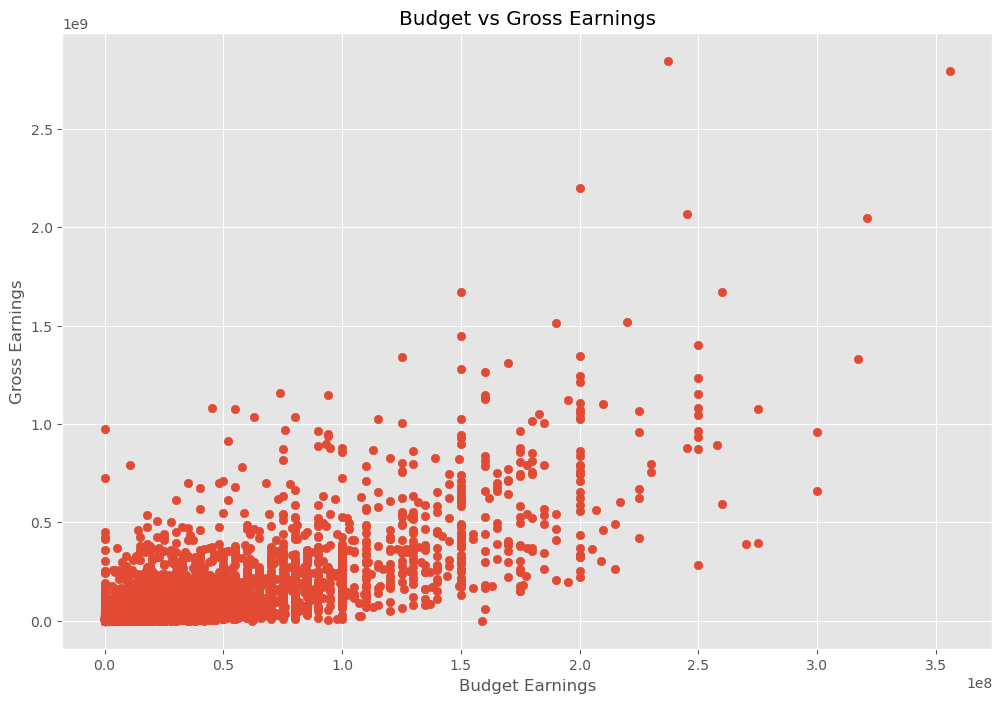

In [51]:
# Scatter plot with budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget Earnings')

plt.ylabel('Gross Earnings')

plt.show()

In [48]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

<Axes: xlabel='budget', ylabel='gross'>

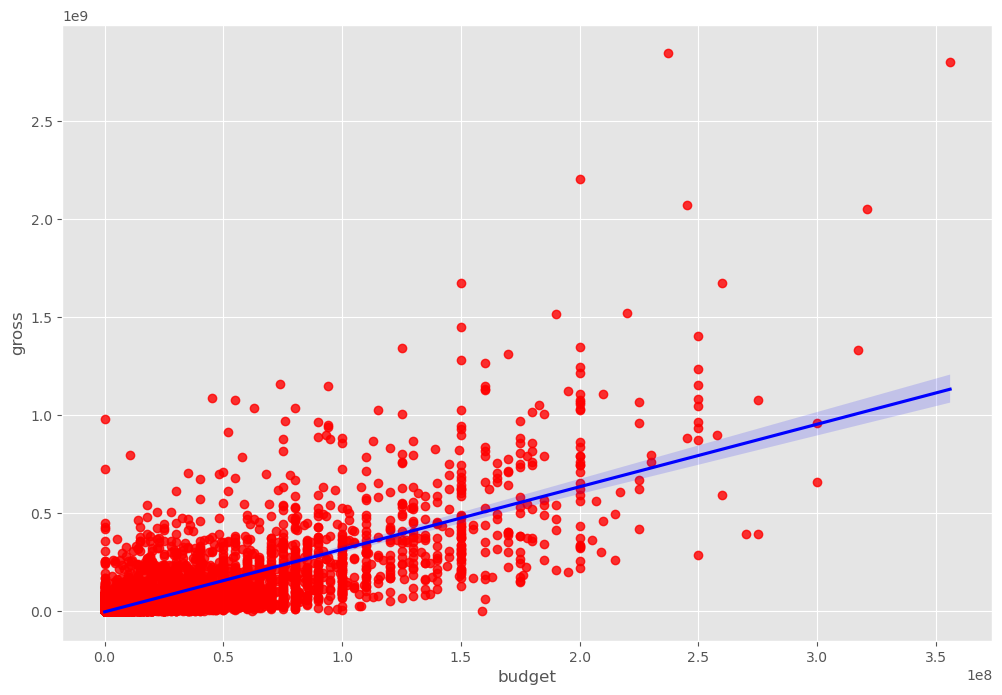

In [52]:
# Plot the Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})



In [ ]:
# Let's start looking at correlation




In [61]:
df.corr(numeric_only=True) # types of correlation is pearson, kendall, spearmon

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

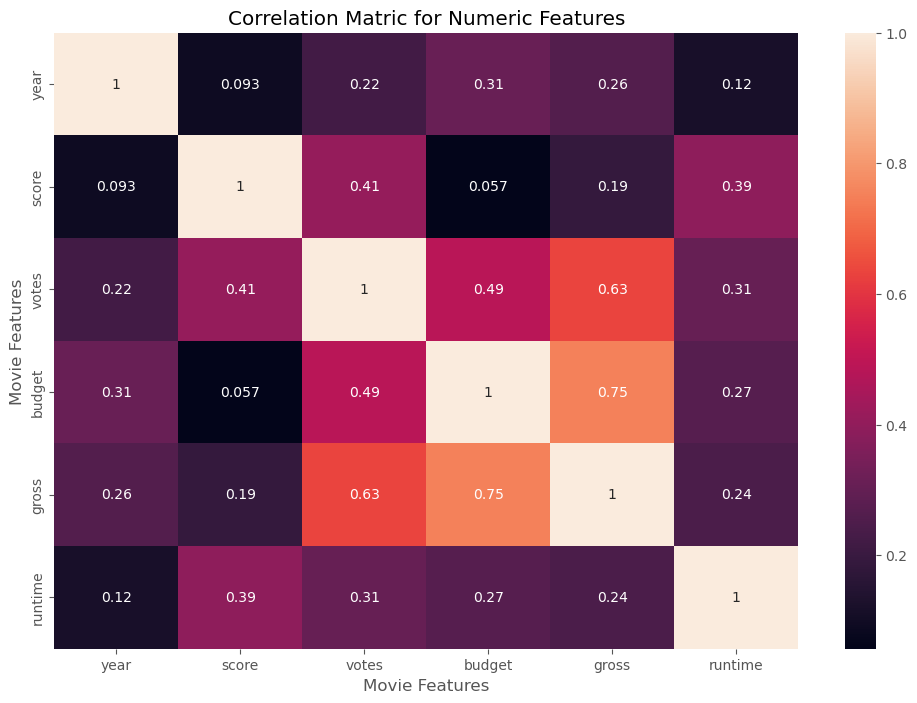

In [63]:
# High correlation between budget and gross

correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [64]:
# Looks at Company Column

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized



name  rating  genre  year  released  score    votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000      1155    1779   
7445   535       6      0  2019       184    8.4   903000       162     744   
3045  6896       6      6  1997       705    7.8  1100000      1155    1779   
6663  5144       6      0  2015       699    7.8   876000      1125    2551   
7244   536       6      0  2018       193    8.4   897000       162     744   
7480  6194       5      2  2019      1489    6.9   222000      1455    1920   
6653  2969       6      0  2015      1705    7.0   593000       517    3569   
6043  5502       6      0  2012      2473    8.0  1300000      1517    2315   
6646  2145       6      0  2015       222    7.1   370000      1189     707   
7494  2131       5      2  2019      2677    6.8   148000       432    1951   
6644   534       6      0  2015      2236    7.3   777000      1517    2315   
7247   791       6      0  2018       960    7.3   661000      2457    3796   
5845  2407       6      1  2011      1446    8.1   790000       679    4053   
7075  5145       6      0  2017       662    7.0   581000      2282    3519   
7271  2970       6      0  2018      1800    6.2   277000      1121    1094   
6262  2130       5      2  2013      2716    7.4   585000       432    1951   
7072   657       5      7  2017      2023    7.1   283000       250    4001   
7281  2760       5      2  2018      1730    7.6   263000       303     492   
7055  5833       6      0  2017        62    6.6   214000       835    1432   
6244  2823       6      0  2013      2450    7.1   779000      2543    1175   
6688  3622       5      2  2015      1396    6.4   218000      1639     535   
6846  1056       6      0  2016      2489    7.8   694000       162     744   
7250   474       6      0  2018       749    6.9   404000      1189     991   
4245  6221       6      0  2003       681    8.9  1700000      2193    1746   
7458  5084       6      0  2019      1502    7.5   359000      1463     705   
7456  1061       6      0  2019      2214    6.8   478000       147     256   
5878  6968       6      0  2011      1871    6.2   390000      1886    1238   
6059  4951       6      0  2012      2805    7.7   642000      2476    3126   
6494  6967       6      0  2014      1850    5.6   302000      1886    1238   
2448  6194       2      2  1994      1812    8.5   970000      2415    1703   
6047  5726       6      0  2012      1511    8.4  1600000       483    2266   
7463  5141       6      0  2019       732    6.5   394000      1125     715   
7450  2930       7      5  2019      3063    8.4  1000000      2767    4249   
7488  6949       2      2  2019      1788    7.7   217000      1509    2159   
5685  6948       2      2  2010      1753    8.2   776000      1678    2159   
4852  4258       6      0  2006      1646    7.3   668000       996    4148   
6869  4616       6      0  2016       674    7.8   572000       912     718   
7481   290       5      1  2019      2395    6.9   239000      1031    2079   
5860  4261       6      0  2011      2351    6.6   492000      2341    4148   
7140  1552       5      2  2017      1897    6.3   119000      1639     759   
2245  2967       6      0  1993      1690    8.1   894000      2660    2932   
6908  1978       5      2  2016      1745    7.3   250000       124     216   
3451  5138       5      0  1999      2319    6.5   748000       963    1473   
5667   300       5      1  2010      2183    6.4   392000      2745    2608   
6863  7504       5      2  2016      2176    8.0   450000       362     577   
6045  6001       6      1  2012       652    7.8   773000      2193    1360   
3843  2412       5      1  2001      2594    7.6   685000       435    1742   
5243  5725       6      0  2008      1477    9.0  2400000       483    2266   
5652  2406       6      1  2010      2621    7.7   495000       679    4053   
6311  1551       5      2  2013      1600    7.3   37700

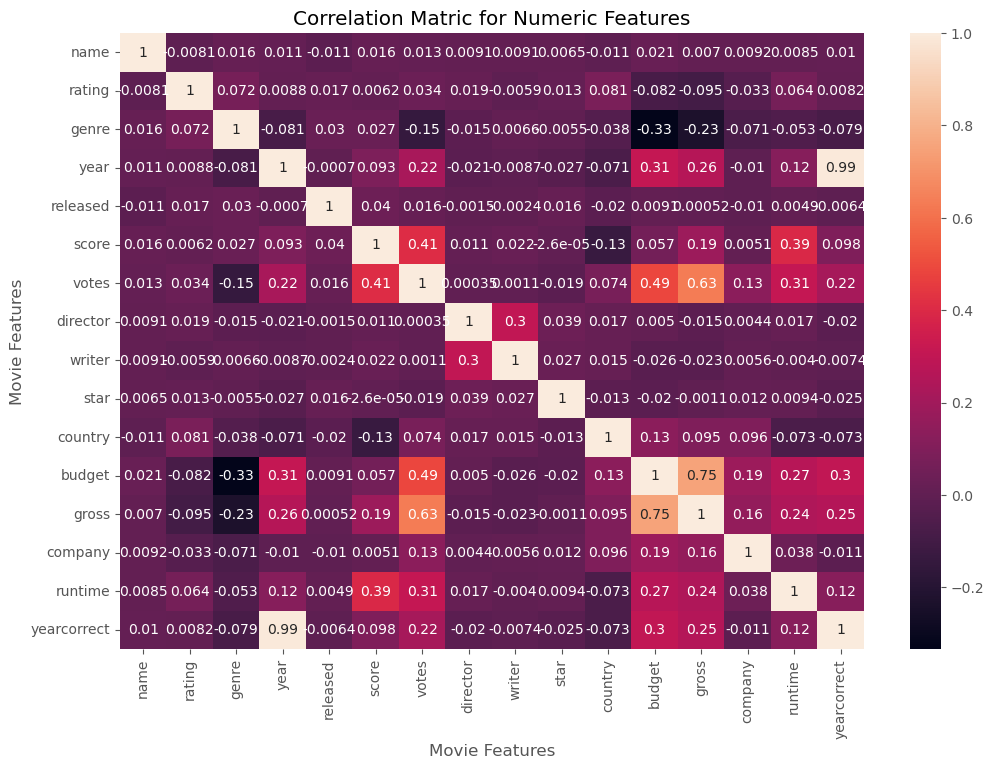

In [66]:
correlation_matrix = df_numerized.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [67]:
df_numerized.corr(numeric_only=True)

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score        0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company      0.009212 -0.032954 -0.071066 -0.010433 -0.010471  0.005067   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   
yearcorrect  0.010071  0.008230 -0.078972  0.990063 -0.006411  0.097989   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133455  0.004404  0.005644  0.012437  0.095546  0.186472   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect  0.217965 -0.019692 -0.007400 -0.025231 -0.072682  0.300649   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009212  0.008483     0.010071  
rating      -0.095450 -0.032954  0.064133     0.008230  
genre       -0.234297 -0.071066 -0.052914    -0.078972  
year         0.261900 -0.010433  0.116358     0.990063  
released     0.000519 -0.010471  0.004852    -0.006411  
score        0.186012  0.005067  0.394564     0.097989  
votes        0.632870  0.133455  0.306984     0.217965  
director    -0.014916  0.004404  0.017062    -0.019692  
writer      -0.022997  0.005644 -0.004036    -0.007400  
star        -0.001129  0.012437  0.009418    -0.025231  
country      0.095325  0.095546 -0.073319    -0.072682  
budget       0.750157  0.186472  0.268372     0.300649  
gross        1.000000  0.156743  0.244339     0.254946  
company      0.156743  1.000000  0.037527    -0.011065  
runtime      0.244339  0.037527  1.000000     0.120915  
yearcorrect  0.254946 -0.011065  0.120915     1.000000

In [68]:
correlation_mat = df_numerized.corr(numeric_only=True)

corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009212
             runtime        0.008483
             yearcorrect    0.010071
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [70]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
score        country       -0.133346
country      score         -0.133346
rating       gross         -0.095450
gross        rating        -0.095450
rating       budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
yearcorrect  genre         -0.078972
genre        yearcorrect   -0.078972
country      runtime       -0.073319
runtime      country       -0.073319
yearcorrect  country       -0.072682
country      yearcorrect   -0.072682
company      genre         -0.071066
genre        company       -0.071066
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052914
genre        runtime       -0.052914
country      genre         -0.037615
g

In [71]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.632870
votes        gross          0.632870
gross        budget         0.750157
budget       gross          0.750157
year         yearcorrect    0.990063
yearcorrect  year           0.990063
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings